In [1]:
import matplotlib.pyplot as plt
import numpy as np
import canada_tax_estimator as cte

In [2]:
tax_estimator = cte.CanadaTaxEstimator(np.array([0, 55867, 111733, 173205, 246752]), np.array([0.15, 0.205, 0.26, 0.29, 0.33]))
tax_estimator.addProvince("Newfoundland and Labrador", np.array([0, 43198, 86395, 154244, 215943, 275870, 551739, 1103478]), np.array([0.087, 0.145, 0.158, 0.178, 0.198, 0.208, 0.213, 0.218]))
tax_estimator.addProvince("Prince Edward", np.array([0, 32656, 64313, 105000, 140000]), np.array([0.0965, 0.1363, 0.1665, 0.18, 0.1875]))
tax_estimator.addProvince("Nova Scotia", np.array([0, 29590, 59180, 93000, 150000]), np.array([0.0879, 0.1495, 0.1667, 0.175, 0.21]))
tax_estimator.addProvince("New Brunswick", np.array([0, 49958, 99916, 185064]), np.array([0.094, 0.14, 0.16, 0.195]))
tax_estimator.addProvince("Quebec", np.array([0, 51780, 103545, 126000]), np.array([0.14, 0.19, 0.24, 0.2575]))
tax_estimator.addProvince("Ontario", np.array([0, 51446, 102894, 150000, 220000]), np.array([0.0505, 0.0915, 0.1116, 0.1216, 0.1316]))
tax_estimator.addProvince("Manitoba", np.array([0, 47000, 100000]), np.array([0.108, 0.1275, 0.174]))
tax_estimator.addProvince("Saskatchewan", np.array([0, 52057, 148734]), np.array([0.105, 0.125, 0.145]))
tax_estimator.addProvince("Alberta", np.array([0, 148269, 177922, 237230, 355845]), np.array([0.1, 0.12, 0.13, 0.14, 0.15]))
tax_estimator.addProvince("British Columbia", np.array([0, 47937, 95875, 110076, 133664, 181232, 252752]), np.array([0.0506, 0.077, 0.105, 0.1229, 0.147, 0.168, 0.205]))
tax_estimator.addProvince("Yukon", np.array([0, 55867, 111733, 173205, 500000]), np.array([0.064, 0.09, 0.109, 0.128, 0.15]))
tax_estimator.addProvince("Northwestern Territories", np.array([0, 50597, 101198, 164525]), np.array([0.059, 0.086, 0.122, 0.145]))
tax_estimator.addProvince("Nunavut", np.array([0, 53268, 106537, 173205]), np.array([0.04, 0.07, 0.09, 0.115]))

def plot_taxes_per_province(x, provinces:list[str], f):
    for province in provinces:
        y_rates = np.vectorize(f(province))(x)
        plt.plot(x, y_rates, label=province)
    plt.legend(bbox_to_anchor =(1.55,-.02), loc='lower right')
    plt.xlabel("Income (CAD)")
    plt.ylabel("Average Tax Rate (%)")
    plt.title("Tax Rate vs. Income by Province")
    plt.grid(True)
    plt.xscale('log')
    plt.show()

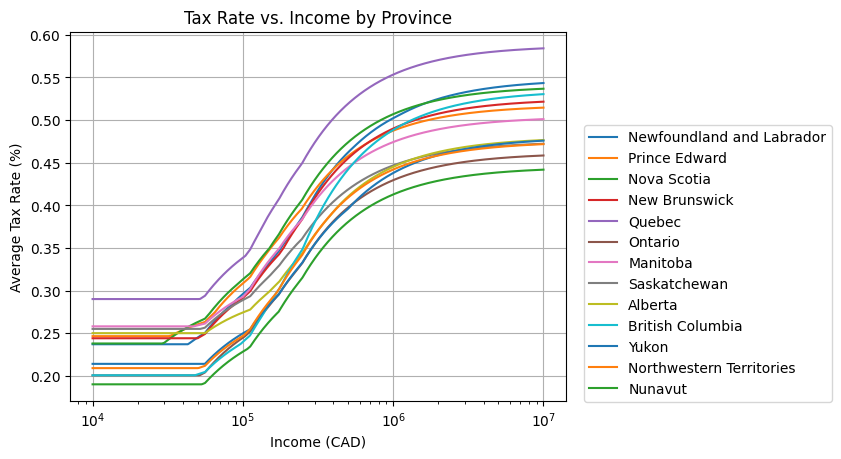

In [3]:
plot_taxes_per_province(
    np.arange(10000, 10000001, 1000), 
    tax_estimator.getProvinces(), 
    lambda p: lambda v: tax_estimator.tax_rate(p, v),
)


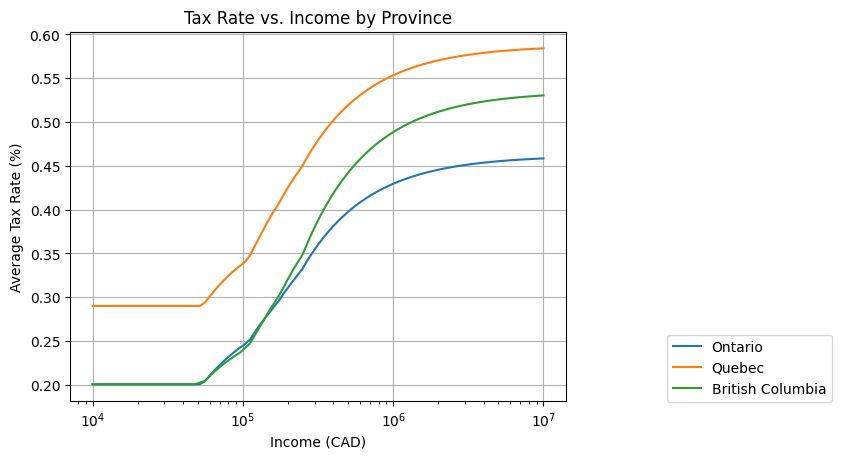

In [4]:
plot_taxes_per_province(
    np.arange(10000, 10000001, 1000), 
    ["Ontario", "Quebec", "British Columbia"], 
    lambda p: lambda v: tax_estimator.tax_rate(p, v),
)

In [32]:
def plot_taxes_per_province_per_cgs(x, provinces:list[str], capital_gains:list[float], f):
    for province in provinces:
        for cg in capital_gains:
            y_rates = np.vectorize(f(province, cg))(x)
            plt.plot(x, y_rates, label=province+"-CG: "+str(cg*100)+"%")
    plt.legend(bbox_to_anchor =(1.55,-.02), loc='lower right')
    plt.xlabel("Income (CAD)")
    plt.ylabel("Average Tax Rate (%)")
    plt.title("Tax Rate vs. Income by Province")
    plt.grid(True)
    plt.xscale('linear')
    plt.show()

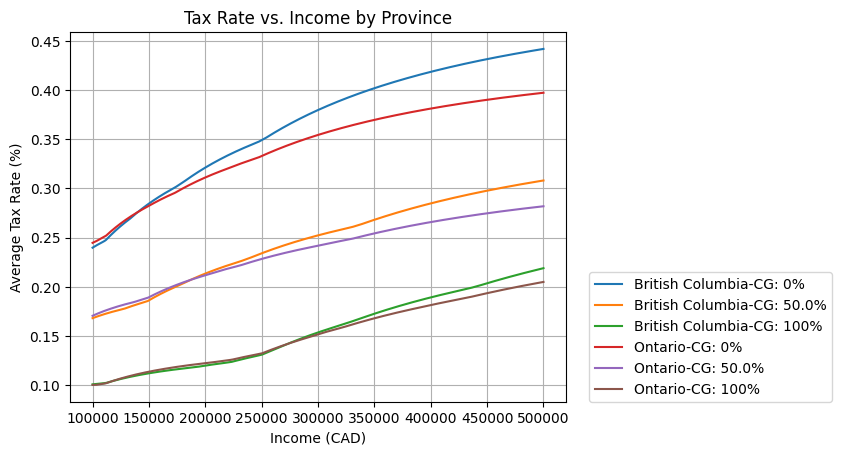

In [35]:
plot_taxes_per_province_per_cgs(
    np.arange(100000, 500001, 200), 
    ["British Columbia", "Ontario"], 
    [0, .5, 1],
    lambda p, c: lambda v: tax_estimator.tax_rate(p, v, c),
)